In [3]:
# Source: https://github.com/cs109/2015lab5/blob/master/LearningModels.ipynb
# Harvard 2015 class Machine Learning Paella
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [4]:
df=pd.read_csv("religion.csv")
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


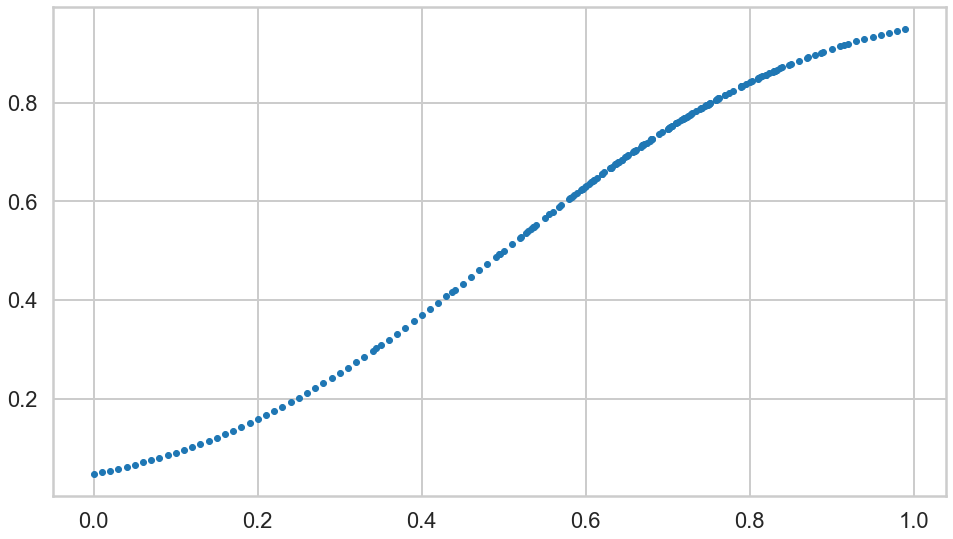

In [25]:
x=df.rfrac.values
f=df.promney.values
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(x,f,'.')

In [6]:
#allindexes=np.sort(np.random.choice(x.shape[0], size=100, replace=False))
indexes=np.sort(np.random.choice(x.shape[0], size=30, replace=False))

In [7]:
samplex = x[indexes]
samplef = f[indexes]

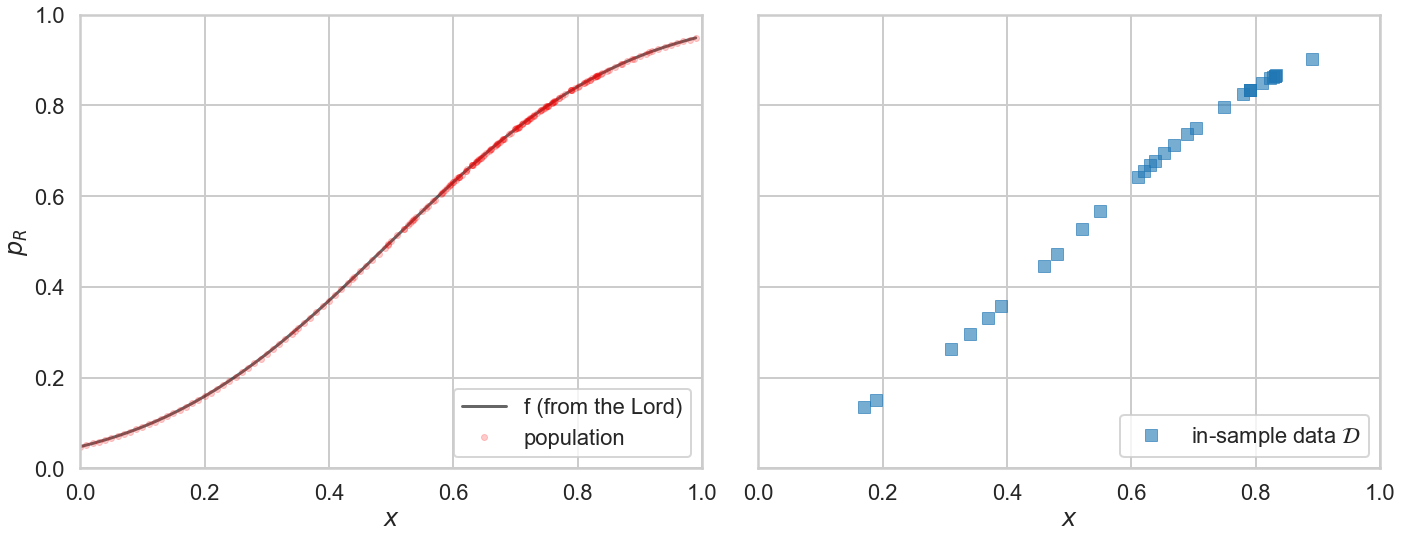

In [8]:
axes=make_plot()
axes[0].plot(x,f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(x,f, 'r.', alpha=0.2, label="population");
axes[1].plot(samplex,samplef, 's', alpha=0.6, label="in-sample data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

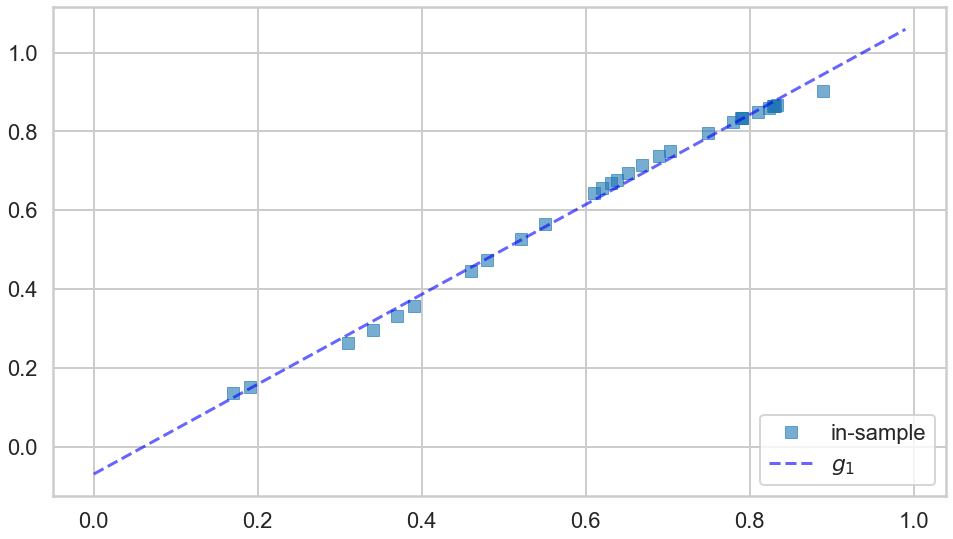

In [24]:
#For this sample 30 data points from the overall population (religion.csv) lets see different
#polynominial equations starting with a linear function
#Lets find the best fit straight line ie. the function y=g1(x).
plt.rcParams["figure.figsize"] = [16,9]
g1 = np.poly1d(np.polyfit(x[indexes],f[indexes],1))
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4);

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


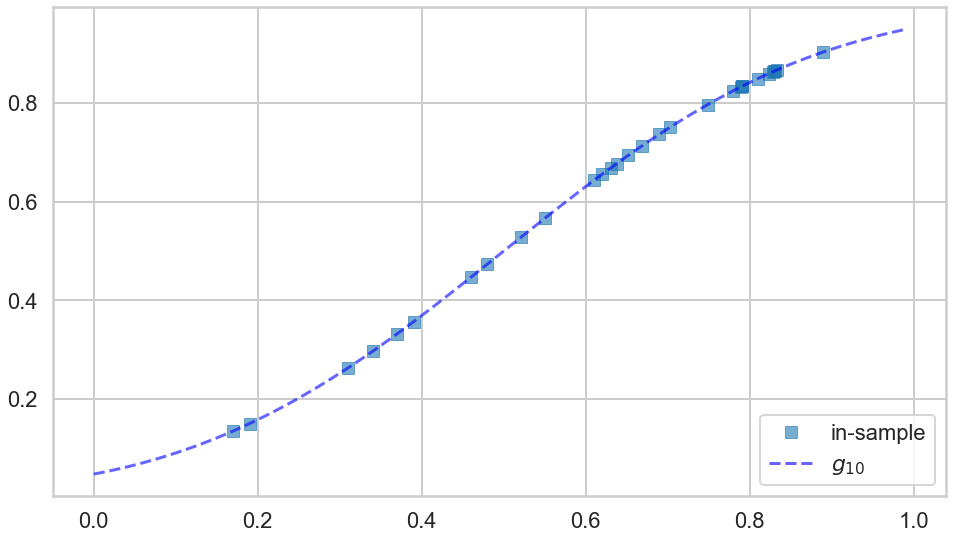

In [22]:
#If you notice in above graph the linear esquation does not fit the curvature data points sufficiently
#This means there is BIAS ie. deterministic error ie. gap between sample data & predicted line
#To get a closer fit, next lets try a 20th order polynmial (just for example)
g20 = np.poly1d(np.polyfit(x[indexes],f[indexes],20))
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g20(x), 'b--', alpha=0.6, label="$g_{10}$");
plt.legend(loc=4);

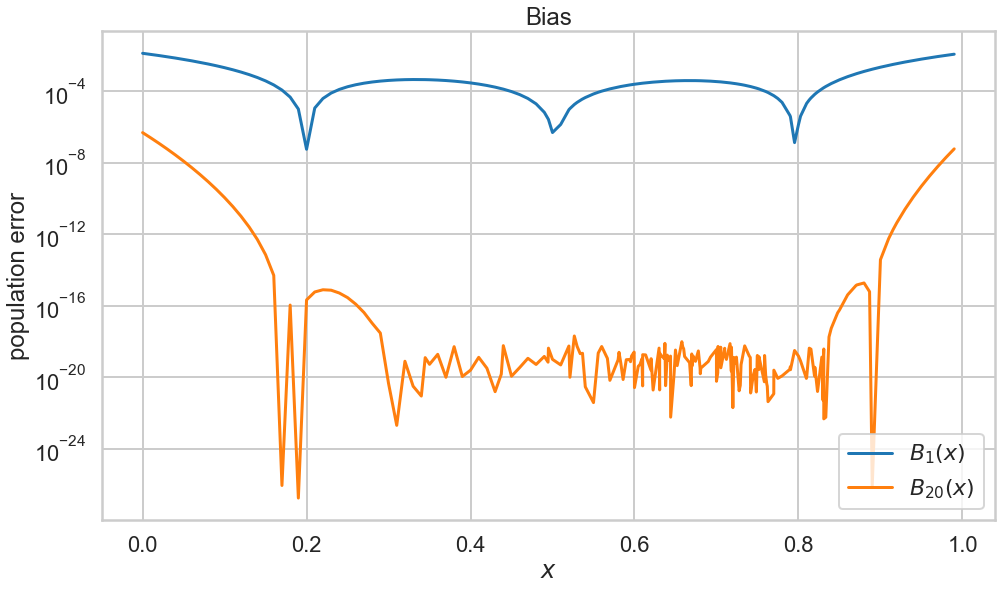

In [23]:
#Above graph seems a much better fit for the 30 sample data points. Curve is matched.
#Let us check the actual BIAS for the linear & 20th order polynomial 
#We can plot the BIAS ie. square of the difference between f the sample point & g the prediction
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(x, (g1(x)-f)**2, lw=3, label="$B_1(x)$")
plt.plot(x, (g20(x)-f)**2, lw=3,label="$B_{20}(x)$");
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Bias");

<ipython-input-20-4d5198a11bb6>:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  plt.hist(x, normed=True, bins=30, alpha=0.7)


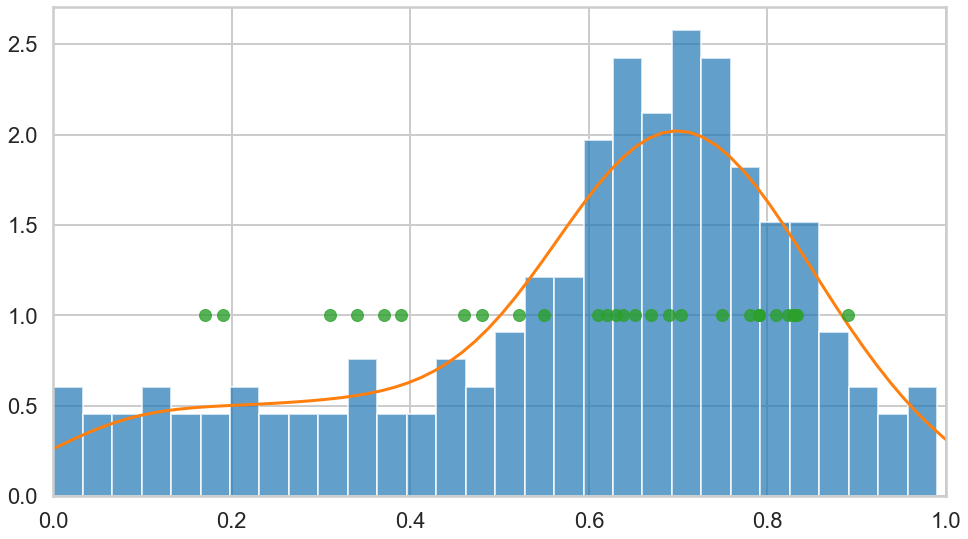

In [20]:
#####How do we find the best fit model from the best hypothesis space? This is what learning is all about###
# Learning is therefore finding the function that minimises the square error on sample data
# This process of finding least square error is also called Empirical Risk Mimimisation (or ERM) 
# Then extrapolate this function over the polulation hoping ERM does not change for the population
# Question is is sample distribution representative of the polulation distribution. Lets check for this data
# Plot polulaton histogram with 30 bins & assumed normal distribution
plt.rcParams["figure.figsize"] = [16,9]
plt.hist(x, normed=True, bins=30, alpha=0.7)
sns.kdeplot(x)
#Next plot the 30 sample data points in orange line graph & then the ratio of bin & sample plots as green dots
plt.plot(x[indexes], [1.0]*len(indexes),'o', alpha=0.8)
plt.xlim([0,1]);

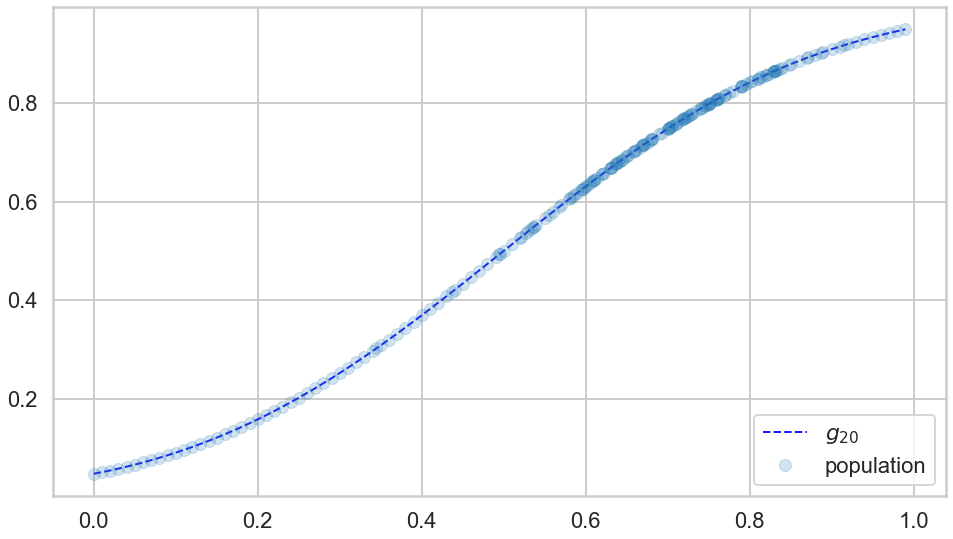

In [21]:
# Check if the 20th order polynomial fits the polulation
#plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(x,g20(x), 'b--', alpha=0.9, lw=2, label="$g_{20}$");
plt.plot(x,f, 'o', alpha=0.2, label="population");
plt.legend(loc=4);

In [14]:
#Looks it fits very well with very low bias.
#Unfortunately in real life there is always noise ie. y=f(x)+E where E is noise
#Noise can be stochachastic or/and systematic
#Creating random noise for some points in the polulation
sigma=0.06
mask=(x > 0.65) & (x < 0.8)
sigmalist=sigma+mask*0.03

y = f + sp.stats.norm.rvs(scale=sigmalist, size=200)
#the next three lines just ensure that y remains a probability
yadd = (y < 0.0) *(0.01-y)
ysub = (y > 1.0)*(y - 1.0)
y = y + yadd -ysub

In [2]:
#Plotting population with noise
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], y[indexes], 's', alpha=0.6, label="in-sample y (observed)");
plt.plot(x, y, '.', alpha=0.6, label="population y");
plt.xlabel('$x$');
plt.ylabel('$p_R$')
plt.legend(loc=4);

NameError: name 'plt' is not defined

In [26]:
# Now that noisy points exist, let's see which is a better fit the linear or 20th polynomial
g1noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],1))
g20noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],20))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


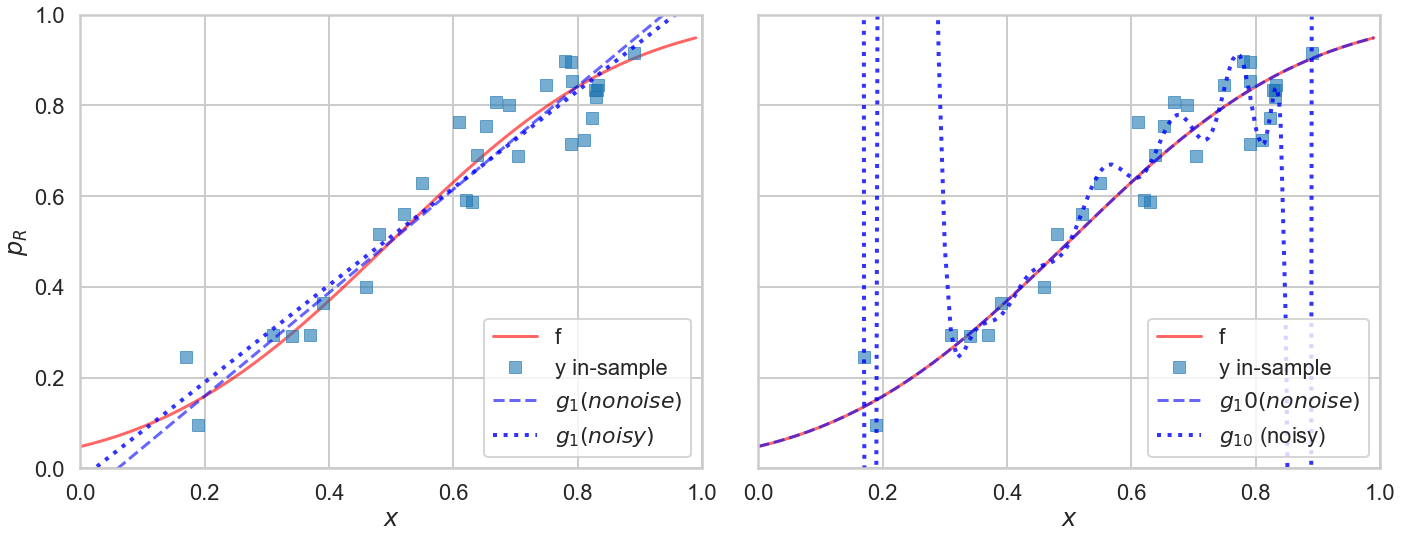

In [27]:
axes=make_plot()
axes[0].plot(x,f, 'r-', alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', alpha=0.6, label="f");
axes[0].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[1].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[0].plot(x,g1(x),  'b--', alpha=0.6, label="$g_1 (no noise)$");
axes[0].plot(x,g1noisy(x), 'b:', lw=4, alpha=0.8, label="$g_1 (noisy)$");
axes[1].plot(x,g20(x),  'b--', alpha=0.6, label="$g_10 (no noise)$");
axes[1].plot(x,g20noisy(x), 'b:', lw=4, alpha=0.8, label="$g_{10}$ (noisy)");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

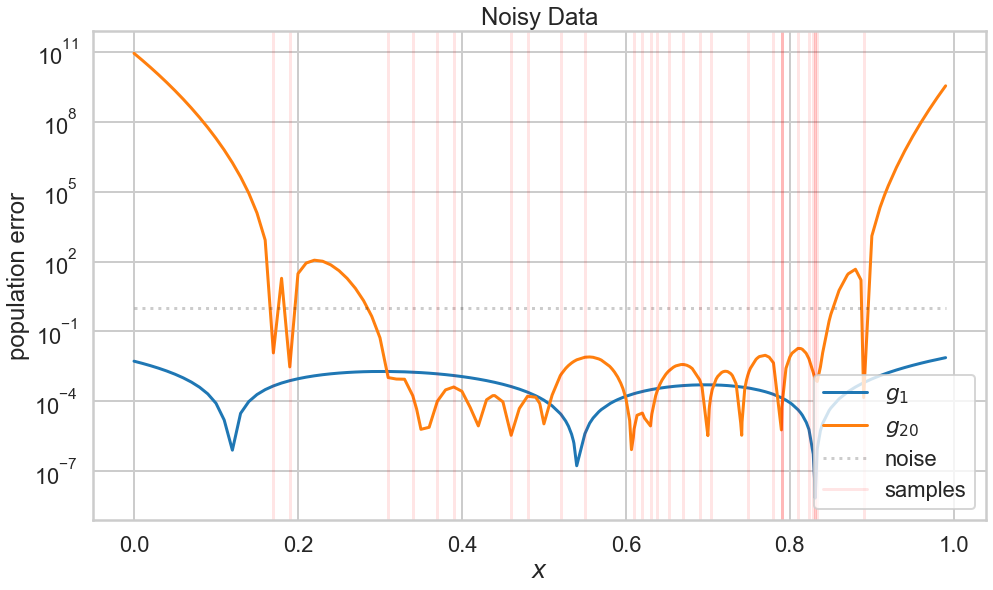

In [28]:
# Look at above graphs. The best fit line changes a little & still does not fit all points well
# But look at the dotted line of 20th order polynomial. It tries to "fit" ALL points incl noise!!
# Draw the Bias graphs again
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(x, ((g1noisy(x)-f)**2), lw=3, label="$g_1$")
plt.plot(x, ((g20noisy(x)-f)**2), lw=3,label="$g_{20}$");
plt.plot(x, [1]*x.shape[0], "k:", label="noise", alpha=0.2);
for i in indexes[:-1]:
    plt.axvline(x[i], 0, 1, color='r', alpha=0.1)
plt.axvline(x[indexes[-1]], 0, 1, color='r', alpha=0.1, label="samples")
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Noisy Data");

In [29]:
#Clearly the higher polynomial has high error on the population & is a poor choice.
# MORE COMPLEX MODELS OVERFIT TO SAMPLE ie. HAS HIGH VARIANCE!!
# So if we choose different sets of 30 sample points then over the range a complex model has higher variance
# Lets check these points graphically for degrees 1 & 20th polynomial, 200 population & 30 sample simulations
def gen(degree, nsims, size, x, out):
    outpoly=[]
    for i in range(nsims):
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        pc=np.polyfit(x[indexes], out[indexes], degree)
        p=np.poly1d(pc)
        outpoly.append(p)
    return outpoly
polys1 = gen(1, 200, 30,x, y);
polys20 = gen(20, 200, 30,x, y);

<ipython-input-29-3989ec5a9f44>:14: RankWarning: Polyfit may be poorly conditioned
  polys20 = gen(20, 200, 30,x, y);
<ipython-input-29-3989ec5a9f44>:14: RankWarning: Polyfit may be poorly conditioned
  polys20 = gen(20, 200, 30,x, y);
<ipython-input-29-3989ec5a9f44>:14: RankWarning: Polyfit may be poorly conditioned
  polys20 = gen(20, 200, 30,x, y);
<ipython-input-29-3989ec5a9f44>:14: RankWarning: Polyfit may be poorly conditioned
  polys20 = gen(20, 200, 30,x, y);
<ipython-input-29-3989ec5a9f44>:14: RankWarning: Polyfit may be poorly conditioned
  polys20 = gen(20, 200, 30,x, y);
<ipython-input-29-3989ec5a9f44>:14: RankWarning: Polyfit may be poorly conditioned
  polys20 = gen(20, 200, 30,x, y);
<ipython-input-29-3989ec5a9f44>:14: RankWarning: Polyfit may be poorly conditioned
  polys20 = gen(20, 200, 30,x, y);
<ipython-input-29-3989ec5a9f44>:14: RankWarning: Polyfit may be poorly conditioned
  polys20 = gen(20, 200, 30,x, y);
<ipython-input-29-3989ec5a9f44>:14: RankWarning: Polyfit

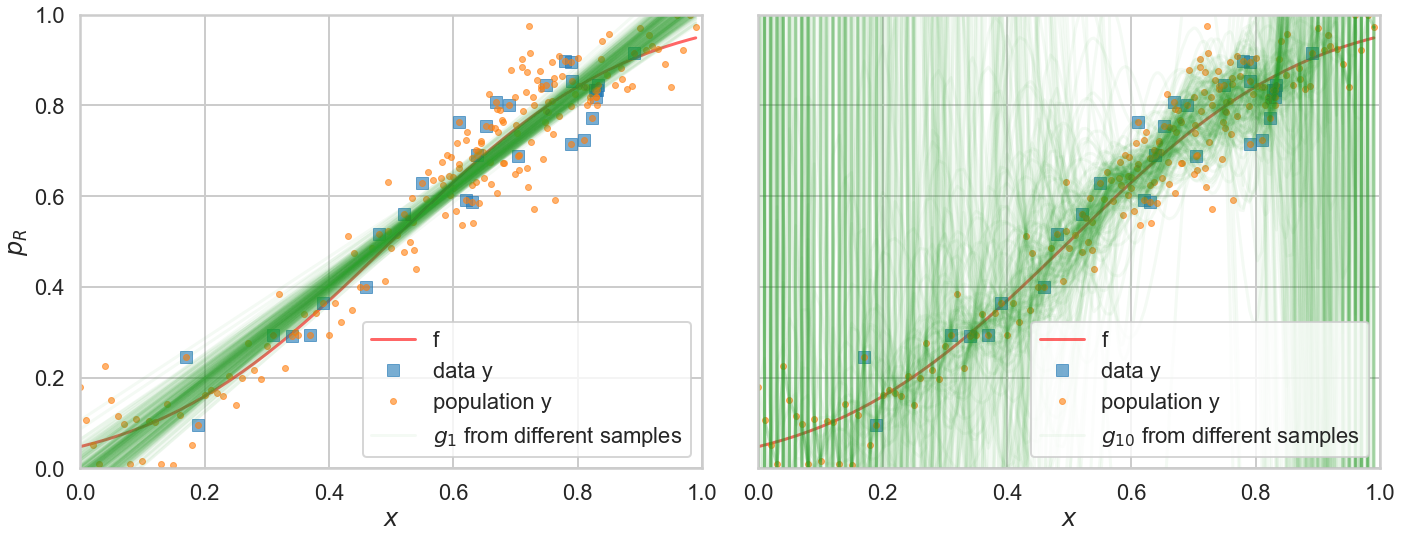

In [30]:
#Plot above series to show variance
axes=make_plot()
axes[0].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[0].plot(x, y, '.', alpha=0.6, label="population y");
axes[1].plot(x, y, '.', alpha=0.6, label="population y");
c=sns.color_palette()[2]
for i,p in enumerate(polys1[:-1]):
    axes[0].plot(x,p(x), alpha=0.05, c=c)
axes[0].plot(x,polys1[-1](x), alpha=0.05, c=c,label="$g_1$ from different samples")
for i,p in enumerate(polys20[:-1]):
    axes[1].plot(x,p(x), alpha=0.05, c=c)
axes[1].plot(x,polys20[-1](x), alpha=0.05, c=c, label="$g_{10}$ from different samples")
axes[0].legend(loc=4);
axes[1].legend(loc=4);

In [ ]:
# On the left are 200 iterations of best fit linear equations each fit on 30 diff points from 200 population
# On the right are the same but for 20th order polynomial. The green shows spread of error or variance!!

In [ ]:
# Next chapter we will introduce SciKit Learn a very powerful & main ML library
# It contains 3 module interfaces: an estimator interface for building and ﬁtting models, 
# a predictor interface for making predictions and a transformer interface for converting data.